<a href="https://colab.research.google.com/github/PaulBarz/03MAIR---Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_BarzalloVallejo_Paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Boris Paul Barzallo Vallejo  <br>
Url: https://github.com/PaulBarz/03MAIR---Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos_BarzalloVallejo_Paul.ipynb<br>
Google Colab: https://colab.research.google.com/drive/1pD0H2cjngrvmwc4pvgPGURXSLSH3dv3V?usp=sharing <br>
Problema:
>2. Organizar los horarios de partidos de La Liga<br>

Descripción del problema:

• Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.

• Los horarios disponibles se conocen a priori y son los siguientes:
<table border="1">
  <tr>
    <th>Viernes</th>
    <td>20</td>
  </tr>
  <tr>
    <th>Sábado</th>
    <td>12, 16, 18, 20</td>
  </tr>
  <tr>
    <th>Domingo</th>
    <td>12, 16, 18, 20</td>
  </tr>
  <tr>
    <th>Lunes</th>
    <td>20</td>
  </tr>
</table>


En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

• Se conoce estadísticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)
<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="background-color: black; color: white;"></th>
    <th style="background-color: black; color: white;">Categoría A</th>
    <th style="background-color: black; color: white;">Categoría B</th>
    <th style="background-color: black; color: white;">Categoría C</th>
  </tr>
  <tr>
    <td style="background-color: white; color: black;">Categoría A</td>
    <td>2 Millones</td>
    <td>1,3 Millones</td>
    <td>1 Millones</td>
  </tr>
  <tr>
    <td style="background-color: white; color: black;">Categoría B</td>
    <td></td>
    <td>0.9 Millones</td>
    <td>0.75 Millones</td>
  </tr>
  <tr>
    <td style="background-color: grey; color: black;">Categoría C</td>
    <td></td>
    <td></td>
    <td>0.47 Millones</td>
  </tr>
</table>

Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

• Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes
<table style="width:100%; border-collapse: collapse; border: 1px solid black;">
  <tr>
    <th style="background-color: grey;"></th>
    <th style="background-color: grey;">Viernes</th>
    <th style="background-color: grey;">Sábado</th>
    <th style="background-color: grey;">Domingo</th>
    <th style="background-color: grey;">Lunes</th>
  </tr>
  <tr>
    <td style="background-color: lightgrey;">12h</td>
    <td>-</td>
    <td>0.55</td>
    <td>0.45</td>
    <td>-</td>
  </tr>
  <tr>
    <td style="background-color: lightgrey;">16h</td>
    <td>-</td>
    <td>0.7</td>
    <td>0.75</td>
    <td>-</td>
  </tr>
  <tr>
    <td style="background-color: lightgrey;">18h</td>
    <td>-</td>
    <td>0.8</td>
    <td>0.85</td>
    <td>-</td>
  </tr>
  <tr>
    <td style="background-color: lightgrey;">20h</td>
    <td>0.4</td>
    <td>1</td>
    <td>1</td>
    <td>0.4</td>
  </tr>
</table>


• Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:

<table style="width:100%; border-collapse: collapse; border: 1px solid black;">
  <tr>
    <th style="background-color: black; color: white;">Coincidencias</th>
    <th style="background-color: black; color: white;">-%</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0%</td>
  </tr>
  <tr>
    <td>1</td>
    <td>25%</td>
  </tr>
  <tr>
    <td>2</td>
    <td>45%</td>
  </tr>
  <tr>
    <td>3</td>
    <td>60%</td>
  </tr>
  <tr>
    <td>4</td>
    <td>70%</td>
  </tr>
  <tr>
    <td>5</td>
    <td>75%</td>
  </tr>
  <tr>
    <td>6</td>
    <td>78%</td>
  </tr>
  <tr>
    <td>7</td>
    <td>80%</td>
  </tr>
  <tr>
    <td>8</td>
    <td>80%</td>
  </tr>
</table>

Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la
siguiente tabla: TOTAL = 5.88


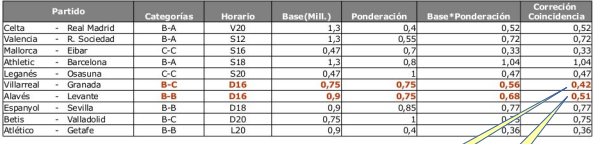

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

In [ ]:
#Respuesta


**1. ¿Cómo represento el espacio de soluciones para una única jornada?**

Para una única jornada, el espacio de soluciones se representa como todas las posibles combinaciones de asignaciones de los partidos programados a los horarios disponibles. Dado que estamos tratando con una jornada específica, cada partido se asigna a un horario, y hay restricciones específicas que deben cumplirse, como tener al menos un partido el viernes y uno el lunes.
<ul>
        <li><strong>Variables de decisión:</strong> Una matriz binaria <em>X</em> donde <em>X<sub>ij</sub></em> indica si el partido <em>i</em> se asigna al horario <em>j</em>.</li>
        <li><strong>Representación:</strong>
            <ul>
                <li>El conjunto de partidos <em>P</em>, donde cada partido tiene equipos asignados con categorías específicas.</li>
                <li>Los horarios disponibles <em>H</em>, incluyendo viernes a las 20h, sábado (12h, 16h, 18h, 20h), domingo (12h, 16h, 18h, 20h), y lunes a las 20h.</li>
                <li>La audiencia base <em>A</em> para cada combinación de categorías de equipos, ajustada por el horario y las coincidencias.</li>
            </ul>
        </li>
        <li><strong>Espacio de soluciones:</strong> Todas las posibles matrices <em>X</em> que asignen cada partido <em>i</em> a un horario <em>j</em>, cumpliendo con las restricciones del problema.</li>
</ul>

Con esta representación, podemos modelar cómo asignar partidos a horarios de manera que se maximice la audiencia total, teniendo en cuenta las restricciones específicas de horario, las categorías de los equipos y las penalizaciones por coincidencias.


**2. ¿Cuál es la función objetivo?**

La función objetivo para este problema de asignación de horarios de partidos en una única jornada, con el fin de maximizar la audiencia, se define como la suma total de las audiencias estimadas para todos los partidos, teniendo en cuenta los coeficientes de ajuste por el horario del partido y las penalizaciones por coincidencias.

La audiencia estimada para cada partido depende de:


<!DOCTYPE html>
<html lang="es">
<body>
    <ol>
        <li><strong>Audiencia Base:</strong> Determinada por las categorías de los equipos enfrentados.</li>
        <li><strong>Coeficientes de Horario:</strong> Ajustes en la audiencia según el horario del partido, reflejando preferencias de horarios por parte de la audiencia.</li>
        <li><strong>Penalizaciones por Coincidencias:</strong> Reducciones en la audiencia si más de un partido se juega en el mismo horario.</li>
    </ol>
    <p>La función objetivo se formula matemáticamente como:</p>
    <p>Maximizar ∑<sub>i=1</sub><sup>P</sup> ∑<sub>j=1</sub><sup>H</sup> X<sub>ij</sub> ⋅ A<sub>ij</sub> ⋅ C<sub>j</sub> ⋅ (1 - D<sub>k</sub>)</p>
    <ul>
        <li>P: Número total de partidos en la jornada.</li>
        <li>H: Número total de horarios disponibles.</li>
        <li>X<sub>ij</sub>: Variable binaria que indica si el partido i se asigna al horario j.</li>
        <li>A<sub>ij</sub>: Audiencia base para el partido i si se enfrentan equipos de categorías específicas en el horario óptimo.</li>
        <li>C<sub>j</sub>: Coeficiente de audiencia para el horario j, ajustando la audiencia base según el horario real del partido.</li>
        <li>D<sub>k</sub>: Penalización por coincidencia basada en el número total de partidos k asignados al mismo horario j.</li>
    </ul>
</body>
</html>

Esta función objetivo capta el equilibrio entre asignar partidos en horarios con altos coeficientes de audiencia y evitar asignaciones que resulten en penalizaciones significativas por coincidencia, todo mientras se maximiza la audiencia total esperada.

**3. ¿Cómo implemento las restricciones?**
Las restricciones son fundamentales para asegurar que cualquier solución al problema de asignación de partidos a horarios cumpla con los requisitos específicos y las limitaciones impuestas.

Asignación Única de Partidos a Horarios:

<ul>
        <li><strong>Asignación Única de Partidos a Horarios:</strong> Cada partido debe asignarse exactamente a un horario. Esto se traduce en que, para cada partido i, la suma de sus asignaciones a todos los posibles horarios j debe ser igual a 1. Se representa como ∑<sub>j=1</sub><sup>H</sup> X<sub>ij</sub> = 1 para todo i.</li>
        <li><strong>Restricciones de Horario Obligatorio:</strong> Debe haber al menos un partido programado para el viernes y otro para el lunes. Esto significa que la suma de las asignaciones de partidos a los horarios específicos del viernes y del lunes debe ser al menos uno.</li>
        <li><strong>Audiencia Basada en Categorías de Equipos:</strong> La audiencia varía según las categorías de los equipos enfrentados, lo que afecta la función objetivo pero se basa en la premisa de que los datos de audiencia están correctamente aplicados según las categorías.</li>
        <li><strong>Coeficientes de Horario:</strong> Los diferentes horarios ajustan la audiencia esperada a través de coeficientes específicos, modificando la audiencia base de los partidos asignados a cada horario.</li>
        <li><strong>Penalizaciones por Coincidencias de Horarios:</strong> Si más de un partido ocurre en el mismo horario, se aplica una penalización a la audiencia. Esto implica monitorear cuántos partidos se asignan a cada horario y aplicar la penalización correspondiente.</li>
</ul>

La implementación de estas restricciones en un modelo matemático o computacional requiere cuidadosa atención a cómo se estructuran los datos y las variables de decisión.


In [15]:
import numpy as np
import pandas as pd



# Datos de los equipos y sus categorías 2024
datos_equipos = {
    'Equipo': ['FC Barcelona', 'Real Madrid', 'Atlético de Madrid', 'Athletic Bilbao', 'Girona',
               'Sevilla', 'Celta', 'Valencia', 'Betis', 'Las Palmas', 'Real Sociedad',
               'Villarreal', 'Rayo Vallecano', 'Cádiz', 'Alavés', 'Granada', 'Almería',
               'Osasuna', 'Mallorca', 'Getafe'],
    'Categoría': ['A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C']
}

# Crear DataFrame
df_equipos = pd.DataFrame(datos_equipos)


#Datos del problema

coeficientes_horario = {
    'Viernes 20': 0.4,
    'Sábado 12': 0.55,
    'Sábado 16': 0.7,
    'Sábado 18': 0.8,
    'Sábado 20': 1.0,
    'Domingo 12': 0.45,
    'Domingo 16': 0.75,
    'Domingo 18': 0.85,
    'Domingo 20': 1.0,
    'Lunes 20': 0.4
}
audiencias_base = {
    ('A', 'A'): 2.0,  # millones
    ('A', 'B'): 1.3,
    ('A', 'C'): 1.0,
    ('B', 'B'): 0.9,
    ('B', 'C'): 0.75,
    ('C', 'C'): 0.47,
    ('C', 'A'): 1.0,
    ('B', 'A'): 1.3,
    ('C', 'B'): 0.75
}

penalizaciones_coincidencia = {
    0: 0,     #porcentaje
    1: 0.25,
    2: 0.45,
    3: 0.60,
    4: 0.70,
    5: 0.75,
    6: 0.78,
    7: 0.80,
    8: 0.80
}


#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

In [ ]:
#Respuesta


El problema de asignar horarios a partidos de fútbol para maximizar la audiencia, teniendo en cuenta las diferentes categorías de equipos, los coeficientes de audiencia por horario, y las penalizaciones por coincidencias, es un problema de optimización combinatoria. Este tipo de problemas suelen ser NP-difíciles, lo que significa que no se conoce un algoritmo que los resuelva en tiempo polinomial.

Orden de Complejidad:

La complejidad del problema puede entenderse considerando el número de partidos P y el número de horarios disponibles H. Para cada partido, hay H posibles horarios a los cuales puede ser asignado. Si consideramos todas las posibles asignaciones de partidos a horarios, el espacio de soluciones crece exponencialmente con P y H, siendo de orden O(H^P).

Contabilizar el Espacio de Soluciones:

Para una única jornada con un número fijo de partidos P y horarios disponibles H, el espacio total de soluciones sería el producto de todas las posibles asignaciones de cada partido a los horarios. Esto es, si tuviéramos 10 partidos y 10 horarios disponibles, habría 10^10 combinaciones posibles a considerar, lo cual ilustra el rápido crecimiento del espacio de soluciones y, por ende, la complejidad del problema.

Sin embargo, este cálculo del espacio de soluciones no toma en cuenta las restricciones adicionales que pueden reducir significativamente el espacio de búsqueda viable. Por ejemplo, la restricción de que debe haber al menos un partido el viernes y uno el lunes, o las penalizaciones por coincidencias, que desincentivan ciertas asignaciones. Aun así, incluso con estas restricciones, el problema sigue siendo altamente complejo y desafiante de resolver de manera exacta para un gran número de partidos y horarios.
<body>
    <h2>Resumen de la Complejidad del Problema</h2>
    <ul>
        <li><strong>Tipo de problema:</strong> NP-dif&#237;cil.</li>
        <li><strong>Orden de complejidad:</strong> Exponencial, aproximadamente O(H&#94;P).</li>
        <li><strong>Espacio de soluciones:</strong> Extremadamente grande para valores realistas de P (n&#250;mero de partidos) y H (n&#250;mero de horarios disponibles), aunque se reduce por restricciones espec&#237;ficas.</li>
    </ul>
</body>

Dada esta complejidad, la búsqueda de soluciones exactas puede no ser viable para instancias grandes del problema, y se podrían considerar métodos de solución aproximados o heurísticos, como algoritmos genéticos, búsqueda tabú, o simulación de enfriamiento simulado, que pueden ofrecer soluciones buenas en tiempos prácticos.


#Diseño
- ¿Que técnica utilizo? ¿Por qué?

Para el problema de asignación de horarios de partidos con el objetivo de maximizar la audiencia, itulice un Algoritmo Genético.

Razones para elegir:

**Flexibilidad y Control:** Implementar el algoritmo nos permite adaptar y ajustar cada aspecto del algoritmo a las especificidades del problema, como las restricciones de horario y las penalizaciones por coincidencia.

**Adaptabilidad al Problema:** Los algoritmos genéticos son particularmente adecuados para problemas de optimización combinatoria con grandes espacios de búsqueda y restricciones complejas, como es nuestro caso.



In [16]:
#Respuesta


# Configuración inicial
num_partidos = 10  # 10 partidos a asignar
num_horarios = 10   # 10 horarios disponibles
tamaño_poblacion = 30  # Tamaño de la población de soluciones
num_generaciones = 100  # Número de generaciones a evolucionar
tasa_cruce = 0.8  # Probabilidad de cruce
tasa_mutacion = 0.2  # Probabilidad de mutación


# Fijar la semilla aleatoria para reproducibilidad para que nos de siempre la misma jornada, para poder comparar resultados
np.random.seed(42)

# Función para crear una jornada aleatoria
def generar_jornada_aleatoria(df):
    equipos_jornada = df['Equipo'].sample(frac=1).reset_index(drop=True)
    enfrentamientos = [(equipos_jornada[i], equipos_jornada[i + 1]) for i in range(0, len(equipos_jornada), 2)]
    return enfrentamientos

# Generar una jornada aleatoria
jornada_aleatoria = generar_jornada_aleatoria(df_equipos)
for partido in jornada_aleatoria:
    print(f"{partido[0]} vs {partido[1]}")




# Generar población inicial

def generar_poblacion_inicial(tamaño_poblacion, num_partidos, num_horarios):
    poblacion = []
    for _ in range(tamaño_poblacion):
        solucion = np.random.randint(low=1, high=num_horarios-1, size=num_partidos)
        solucion[0] = 0  # Viernes 20h
        solucion[-1] = num_horarios - 1  # Lunes 20h
        np.random.shuffle(solucion)  # Mezclar para evitar posiciones fijas
        poblacion.append(solucion)
    return np.array(poblacion)

poblacion_inicial = generar_poblacion_inicial(tamaño_poblacion, num_partidos, num_horarios) # Usar la configuración inicial para generar la población inicial

#Definimos la funcion fitnees
def obtener_audiencia_base(equipo1, equipo2, audiencias_base, df_equipos):
    categoria1 = df_equipos.loc[df_equipos['Equipo'] == equipo1, 'Categoría'].values[0]
    categoria2 = df_equipos.loc[df_equipos['Equipo'] == equipo2, 'Categoría'].values[0]
    return audiencias_base.get((categoria1, categoria2), 0) + audiencias_base.get((categoria2, categoria1), 0)

def calcular_fitness(poblacion, jornada, df_equipos, coeficientes_horario, audiencias_base, penalizaciones_coincidencia):
    fitness_total = []
    for solucion in poblacion:
        audiencia_total = 0
        tiene_viernes = 0 in solucion
        tiene_lunes = (num_horarios - 1) in solucion
        if not tiene_viernes or not tiene_lunes:
            fitness_total.append(0)  # Penalización severa si no se cumple la restricción
            continue
        coincidencias = {horario: 0 for horario in coeficientes_horario.keys()}

        for idx, partido in enumerate(jornada):
            equipo1, equipo2 = partido
            horario = list(coeficientes_horario.keys())[solucion[idx]]
            audiencia_base = obtener_audiencia_base(equipo1, equipo2, audiencias_base, df_equipos)
            coeficiente = coeficientes_horario[horario]
            coincidencias[horario] += 1

            # Ajustar la audiencia basada en el coeficiente de horario y penalizaciones por coincidencia
            penalizacion = penalizaciones_coincidencia[coincidencias[horario] - 1]
            audiencia_total += audiencia_base * coeficiente * (1 - penalizacion)

        fitness_total.append(audiencia_total)

    return np.array(fitness_total)


# Seleccionar padres para cruce
def seleccion_por_torneo(poblacion, fitnesses, tamaño_torneo=3):
    seleccionados = []
    for _ in range(2):  # Seleccionar dos padres
        aspirantes = np.random.choice(np.arange(len(poblacion)), tamaño_torneo, replace=False)
        seleccionado = aspirantes[np.argmax(fitnesses[aspirantes])]
        seleccionados.append(poblacion[seleccionado])
    return seleccionados[0], seleccionados[1]


# Cruce entre dos soluciones
def cruce_un_punto(padre1, padre2):
    punto = np.random.randint(1, len(padre1))  # Elegir punto de cruce
    hijo1 = np.concatenate([padre1[:punto], padre2[punto:]])
    hijo2 = np.concatenate([padre2[:punto], padre1[punto:]])
    return hijo1, hijo2


# Mutar una solución
def mutar(solucion, tasa_mutacion, num_horarios):
    for i in range(1, len(solucion) - 1):  # Evitar cambiar el primer y último partido
        if np.random.rand() < tasa_mutacion:
            solucion[i] = np.random.randint(1, num_horarios - 1)
    return solucion

# Crear nueva generación
def crear_nueva_generacion(poblacion, fitnesses, num_horarios, tasa_cruce, tasa_mutacion):
    nueva_poblacion = []
    while len(nueva_poblacion) < len(poblacion):
        # Selección de padres
        padre1, padre2 = seleccion_por_torneo(poblacion, fitnesses)
        # Cruce
        if np.random.rand() < tasa_cruce:
            hijo1, hijo2 = cruce_un_punto(padre1, padre2)
        else:
            hijo1, hijo2 = padre1.copy(), padre2.copy()
        # Mutación
        hijo1 = mutar(hijo1, tasa_mutacion, num_horarios)
        hijo2 = mutar(hijo2, tasa_mutacion, num_horarios)
        # Agregar a la nueva población
        nueva_poblacion.append(hijo1)
        if len(nueva_poblacion) < len(poblacion):
            nueva_poblacion.append(hijo2)

    return np.array(nueva_poblacion)


# Algoritmo principal
def algoritmo_genetico():
    # Generar población inicial
    poblacion = generar_poblacion_inicial(tamaño_poblacion, num_partidos, num_horarios)

    for generacion in range(num_generaciones):
        # Evaluar el fitness de la población actual
        fitnesses = calcular_fitness(poblacion, jornada_aleatoria, df_equipos, coeficientes_horario, audiencias_base, penalizaciones_coincidencia)

        # Crear una nueva generación
        poblacion = crear_nueva_generacion(poblacion, fitnesses, num_horarios, tasa_cruce, tasa_mutacion)

        # Opcional: imprimir el mejor fitness en esta generación
        mejor_fitness = np.max(fitnesses)
        print(f"Generación {generacion + 1}, Mejor Fitness: {mejor_fitness}")

    # Evaluar el fitness de la última generación
    fitnesses_finales = calcular_fitness(poblacion, jornada_aleatoria, df_equipos, coeficientes_horario, audiencias_base, penalizaciones_coincidencia)
    mejor_solucion = poblacion[np.argmax(fitnesses_finales)]
    mejor_fitness_final = np.max(fitnesses_finales)
    print(f"Mejor solución final: {mejor_solucion}, con un fitness de: {mejor_fitness_final}")
    return mejor_solucion, mejor_fitness_final

# Ejecutar el algoritmo genético
mejor_solucion, mejor_fitness_final = algoritmo_genetico()




FC Barcelona vs Osasuna
Granada vs Real Madrid
Betis vs Sevilla
Villarreal vs Athletic Bilbao
Mallorca vs Almería
Cádiz vs Atlético de Madrid
Las Palmas vs Getafe
Girona vs Rayo Vallecano
Valencia vs Real Sociedad
Alavés vs Celta
Generación 1, Mejor Fitness: 12.471250000000001
Generación 2, Mejor Fitness: 12.413
Generación 3, Mejor Fitness: 12.241000000000001
Generación 4, Mejor Fitness: 12.609000000000002
Generación 5, Mejor Fitness: 12.901
Generación 6, Mejor Fitness: 12.795750000000002
Generación 7, Mejor Fitness: 12.905000000000001
Generación 8, Mejor Fitness: 12.853749999999998
Generación 9, Mejor Fitness: 12.904
Generación 10, Mejor Fitness: 12.917000000000002
Generación 11, Mejor Fitness: 12.904
Generación 12, Mejor Fitness: 12.706000000000001
Generación 13, Mejor Fitness: 12.976
Generación 14, Mejor Fitness: 13.576
Generación 15, Mejor Fitness: 13.3585
Generación 16, Mejor Fitness: 13.3585
Generación 17, Mejor Fitness: 13.216000000000001
Generación 18, Mejor Fitness: 13.3035
Ge

In [17]:
# IMprimimos los datos en formato tabla
horarios_asignados = [list(coeficientes_horario.keys())[i] for i in mejor_solucion]

# Construir DataFrame con los resultados
resultados_df = pd.DataFrame(jornada_aleatoria, columns=['Local', 'Visitante'])

# Añadir categorías y horarios asignados
resultados_df['Categorías'] = resultados_df.apply(lambda row: df_equipos.loc[df_equipos['Equipo'] == row['Local'], 'Categoría'].values[0] + '-' + df_equipos.loc[df_equipos['Equipo'] == row['Visitante'], 'Categoría'].values[0], axis=1)
resultados_df['Horario'] = horarios_asignados

# Añadir audiencias base y ponderaciones
resultados_df['Base (Mill.)'] = resultados_df.apply(lambda row: audiencias_base.get((row['Categorías'][0], row['Categorías'][2]), 0), axis=1)
resultados_df['Ponderación'] = resultados_df['Horario'].map(coeficientes_horario)

# Calcular audiencia ajustada por la ponderación y corrección por coincidencia
resultados_df['Base*Ponderación'] = resultados_df['Base (Mill.)'] * resultados_df['Ponderación']


# Calcular la audiencia final ajustada
resultados_df['Corrección Coincidencia'] = resultados_df['Base*Ponderación'] * resultados_df['Ponderación']


# Imprimir el DataFrame con los resultados
print(resultados_df)

# Imprimir el total de la audiencia
print("Total:", resultados_df['Corrección Coincidencia'].sum())


          Local           Visitante Categorías     Horario  Base (Mill.)  \
0  FC Barcelona             Osasuna        A-C  Domingo 20          1.00   
1       Granada         Real Madrid        C-A    Lunes 20          1.00   
2         Betis             Sevilla        B-B  Domingo 18          0.90   
3    Villarreal     Athletic Bilbao        B-B   Sábado 18          0.90   
4      Mallorca             Almería        C-C  Viernes 20          0.47   
5         Cádiz  Atlético de Madrid        B-A   Sábado 20          1.30   
6    Las Palmas              Getafe        B-C   Sábado 18          0.75   
7        Girona      Rayo Vallecano        B-B   Sábado 16          0.90   
8      Valencia       Real Sociedad        B-B  Domingo 20          0.90   
9        Alavés               Celta        C-B   Sábado 20          0.75   

   Ponderación  Base*Ponderación  Corrección Coincidencia  
0         1.00             1.000                  1.00000  
1         0.40             0.400           